In [2]:
#import sys, os
#sys.path.append(os.path.expanduser('~/git/botop/build'))
#import libry as ry
from robotic import ry
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
C = ry.Config()
C.addFile(ry.raiPath('../rai-robotModels/scenarios/pandasTable.g'))

obj = C.addFrame('obj')
obj.setPose('t(0. 0.1 0.8)')
obj.setShape(ry.ST.ssBox, size=[.05,.05,.05,.005])
obj.setColor([1,.0,0])
obj.setMass(.1)
obj.setContact(True)
#cameraFrame = C.addFrame("myCamera")
#cameraFrame.setShape(ry.ST.marker, [0.3])
# cameraFrame.setPosition([0,0,2.0])
#cameraFrame.setPosition([0,1.0,2.0])
#cameraFrame.setQuaternion([1,-0.5,0,1])
C.view()

0

In [4]:
bot = ry.BotOp(C, False)
bot.home(C)

[rai] bot.cpp:getImageAndDepth:294(0) creating camera sensor 'camera'


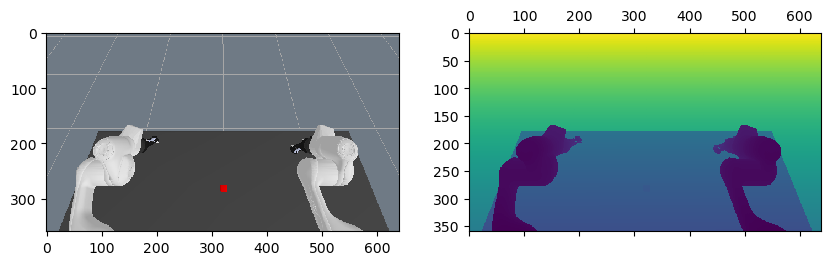

In [5]:
rgb, depth = bot.getImageAndDepth("camera")

fig = plt.figure(figsize=(10,5))
axs = fig.subplots(1, 2)
axs[0].imshow(rgb)
axs[1].matshow(depth)
plt.show()

From the lecture slides, we learned
$$\hat x = f\frac{X}{Z}+p_x,~\hat y = f\frac{Y}{Z}+p_y,$$
where
- $\hat x, \hat y$ are image coordinates ($u$-$v$ or pixel),
- $X, Y, Z$ represent camera coordinates, and
- $p_x, p_y$ are the image offset.

Since we know the $Z$ value of each pixel, we can compute their 3D coordinate (in camera frame):
$$ X = Z\frac{\hat x-p_x}{f},~  Y = Z\frac{\hat y-p_y}{f}.$$

In [6]:
fxypxy = bot.getCameraFxypxy("camera")
print(fxypxy)
depth.shape
cameraFrame = C.getFrame("camera")

[322.19998169 322.19998169 320.         180.        ]


(316, 276)


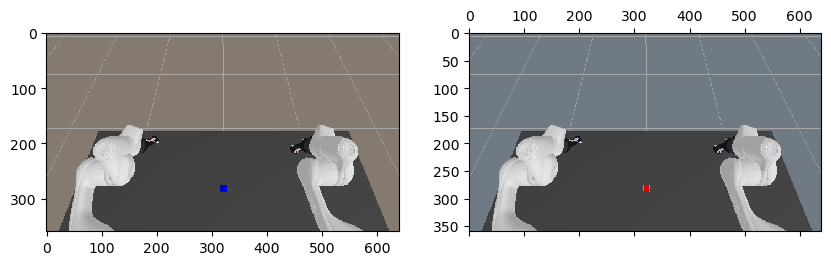

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
axs = fig.subplots(1, 2)

color = cv.cvtColor(rgb, cv.COLOR_BGR2RGB)

        #cv.imshow('OPENCV - rgb', color)
        
# find redish pixel
color_HSV = cv.cvtColor(color, cv.COLOR_BGR2HSV)

result = color_HSV.copy()
lower1 = np.array([0,15,10])
upper1 = np.array([30,255,255])
mask1 = cv.inRange(color_HSV, lower1, upper1)

lower2 = np.array([330,15,10])
upper2 = np.array([360,255,255])
mask2 = cv.inRange(color_HSV, lower2, upper2)

# display binary mask
result[np.where(mask1==0) and np.where(mask2==0)] = 0
result[np.where(mask1!=0) or  np.where(mask2!=0)] = 255
#cv.imshow('OPENCV - binary mask', result)
axs[0].imshow(result)
# segementation
imgray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
contours, _ = cv.findContours(imgray, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# display segements
#cv.imshow('OPENCV - rgb contours', cv.drawContours(color, contours, -1, (0,255,0), 1))
axs[1].matshow(cv.drawContours(rgb, contours, -1, (0,255,0), 1))
# print center of segment
for c in contours:
    #if cv.contourArea(c) <= 50 :
    #    continue    
    x,y,w,h = cv.boundingRect(c)
    center = (x,y)
    print (center)

plt.show()

In [10]:
#C2 = ry.Config()
#pclFrame = C2.addFrame('pcl')
#pclFrame.setPosition(cameraFrame.getPosition())
#pclFrame.setQuaternion(cameraFrame.getQuaternion())
#C.delFrame('pcl')
pclFrame = C.addFrame('pcl', 'camera')

rgb, points = bot.getPointCloud('camera', False)
pclFrame.setPointCloud(points, rgb)
pclFrame.setColor([1.,0.,0.]) #only to see it when overlaying with truth
C.view_recopyMeshes()
C.view()

0

In [11]:
C.delFrame('pcl')

In [12]:
bot.sync(C)

False

In [13]:
cv.destroyAllWindows()
del bot
del C

[rai] bot.cpp:~BotOp:87(0) shutting down BotOp
[rai] simulation.cpp:~BotThreadedSim:60(0) shutting down SimThread
[rai] simulation.cpp:~Simulation:153(0) shutting down Simulation
